# 프로젝트: 가위바위보 분류기 만들기

## 1. 데이터 준비~!

### 1-1. 데이터만들기 

친절하게도 제공된 AIffel(대전)의 다른 분들의 사진을 마니마니 다운받는다...  
@@우리 3조 팀원들의 데이터부터 찾게 되는건 왜일까...? ^^@@

### 1-2. 디렉토리 만들기(rock_scissor_paper)

paper+rock+scissor 각 훈련데이터셋 갯수는 총 10,271개임(계산은 아래와 같음)

3569+3301+3401

### 1-3. 데이터 resize하기(28x28)

In [1]:
from PIL import Image

가위, 바위, 보 훈련 데이터의 사이즈를 변경한다! 단, 변경된 파일경로와 파일명을 수정함!!

### 1-3-1. 가위 이미지 변경~

In [2]:
import os, glob
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper_train/scissor
가위 이미지 resize 완료!


### 1-3-2. 바위 이미지 변경~

In [3]:
import os, glob
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper_train/rock
바위 이미지 resize 완료!


### 1-3-3. 보 이미지 변경~

In [4]:
import os, glob
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper_train/paper
보 이미지 resize 완료!


### 1-3-4. resize한 훈련 데이터셋의 farmat도 행렬로 바꾸어주기 ~!

In [5]:
import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=10271   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 9971 입니다.
x_train shape: (10271, 28, 28, 3)
y_train shape: (10271,)


## 2. 딥러닝 네트워크 설계하기

Sequenential Model을 사용하여 네트워크 설정하기!!!

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (

## 3. 딥러닝 네트워크 학습시키기

### 3-1. 학습 데이터 셋 만들기

In [7]:
import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=10271   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (10271, 28, 28, 3)
y_test shape: (10271,)


### 3-2. 학습데이터 형태 만들기

In [8]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (10271, 28, 28, 3)
Before Reshape - x_test_norm shape: (10271, 28, 28, 3)
After Reshape - x_train_reshaped shape: (10271, 28, 28, 3)
After Reshape - x_test_reshaped shape: (10271, 28, 28, 3)


### 3-3. 학습데이터로 학습시키기 ~~

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
321/321 [==============================] - 3s 10ms/step - loss: 1.0660 - accuracy: 0.4598
Epoch 2/10
321/321 [==============================] - 0s 1ms/step - loss: 0.7799 - accuracy: 0.6417
Epoch 3/10
321/321 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7547
Epoch 4/10
321/321 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.8309
Epoch 5/10
321/321 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8774
Epoch 6/10
321/321 [==============================] - 0s 1ms/step - loss: 0.2566 - accuracy: 0.9107
Epoch 7/10
321/321 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9303
Epoch 8/10
321/321 [==============================] - 0s 1ms/step - loss: 0.1569 - accuracy: 0.9469
Epoch 9/10
321/321 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.9536
Epoch 10/10
321/321 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.965

## 4. 얼마나 잘 만들었는지 확인하기(테스트)

### 4-1. 테스트 데이터로 성능을 확인해 보자

In [10]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

321/321 - 0s - loss: 0.0439 - accuracy: 0.9871
test_loss: 0.04390823468565941 
test_accuracy: 0.9871482849121094


### 4-2. 무엇을 잘못 대답했을까??? 확인하기~!

In [11]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9930966e-01 1.4566391e-04 5.4469646e-04 5.6852353e-12 4.5189272e-10
 1.6442987e-08 5.7308009e-11 1.3916958e-10 3.6405306e-11 2.9004535e-11]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


### 4-3. 사진으로 보여줘 ~

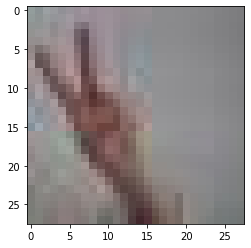

In [12]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

### 4-4. model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인

예측확률분포: [3.7063263e-02 3.2212040e-03 9.5971560e-01 1.5699700e-10 4.2614570e-09
 2.6103830e-09 8.4939664e-09 4.0693990e-09 3.1267533e-09 1.4102146e-09]
라벨: 1, 예측결과: 2


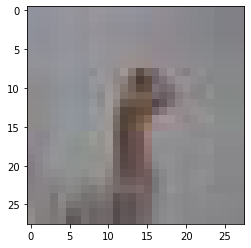

예측확률분포: [2.2575292e-01 2.9706174e-01 4.7718522e-01 1.0757792e-09 2.7132320e-08
 6.3637302e-08 3.9016918e-08 3.6204572e-08 8.8108933e-09 1.2681928e-08]
라벨: 1, 예측결과: 2


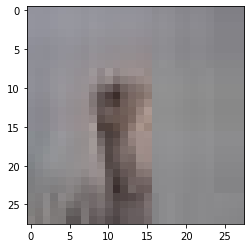

예측확률분포: [2.9246211e-01 7.2102971e-02 6.3543445e-01 1.5281294e-08 7.6653450e-08
 8.5664269e-08 1.4917123e-07 6.8993010e-08 3.1259102e-08 3.0476567e-08]
라벨: 1, 예측결과: 2


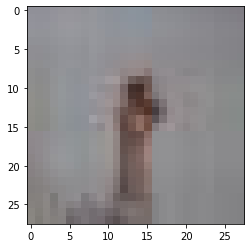

예측확률분포: [2.4776764e-01 2.1425649e-03 7.5008965e-01 2.3831324e-09 1.1197509e-08
 1.3395717e-07 3.5209533e-09 7.1719981e-09 1.6202288e-08 2.4127331e-09]
라벨: 0, 예측결과: 2


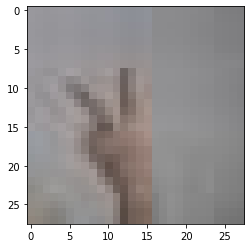

예측확률분포: [7.1748769e-01 3.2946814e-02 2.4956380e-01 7.2540281e-08 4.1654334e-07
 2.9566911e-07 5.6783705e-07 1.9869148e-07 5.3648467e-08 1.2398178e-07]
라벨: 1, 예측결과: 0


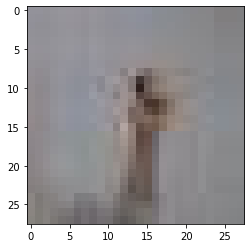

In [13]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 5. 더 좋은 네트워크 만들어보기

In [14]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=16
n_dense=32
n_train_epoch=32


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

## accuracy가 0.98이나 ??? 너무 높은거 아닌가???  
분명 학습데이터(aiffel 사람들 데이터)와 테스트 데이터(내 손가락 데이터)가 섞이지 않았는뎅,,,,  
에효... 1.0 나왔으면 다시 할뻔 했네..... 휴 ..... 

## 6. 노드를 마치며…

### WoW~ 정말 쉽지 않은 하루하루다... ㅎㅎ 팀원들과 다르게 여기저기서 오류메세지가 많이 뜨다보니 조급하기도 했던것 같다..
### 그래도 이렇게 첫 AI 프로젝트를 마쳤다고 생각하니(경험해보니) 너무 좋다...   
### 나름 재미도 느껴지고, 협업의 즐거움도 느끼고, 복잡한 코드들을 이해하고 싶은 욕심이 일어난다...  
### 참 즐거운 프로젝트였다! 앞으로의 프로젝트에서는 내가 팀원들을 많이 알려주고 싶다ㅠㅠ!(도와주셔서 감사해용)  
### Exploration은 직접 해볼수 있어서 너무 좋은 거 같다... (이보다 더 어려워지면 안되는데ㅠㅠ ...)  
### 중요한건...!! 내가 직접 AI를 해봤다는 것이다 ^^ 이번 경험에 만족만족(★★★★★) 드립니다^^